# **Milestone 1**

### **Context:**

 - Why is this problem important to solve?

### it is important to solve this problem so both buyers and sellers of used cars have a better idea of a vehicles's existing value/price.

### **The objective:**

 - What is the intended goal?

## The intended goal is to build a model making use of the available independent variables/features that can effectively predict the price of a used car. This information will be useful in understanding how the prices of these used cars vary with the independent features.

### **The key questions:**

- What are the key questions that need to be answered?



### Determinig the key factors that influence the valuation of a used car.
### what model can accurately predict the price of a used car based on the given attributes.
##  

### **The problem formulation**:

- What is it that we are trying to solve using data science?
### We're trying to figure out the best way that comes closest to predicting and interpreting the price of a used car making use data analysis techniques, different modules, data pre processing, visualization to better understand the individual features and also the correlation between the features. 
### We're also make use of different regression algorithms and pick the one that gives the best result based on the regression model evaluation metrics such as r squared , mean absolute error, root mean square error.


## **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook will give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they wish to explore different techniques. 

# **Milestone 1** 

### **Loading libraries**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

### **Let us load the data**

In [2]:
data = pd.read_csv("used_cars.csv")

### **Understand the data by observing a few rows**

In [4]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [5]:
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


**Observations and Insights: _____**

### Just from having a glance at the table, it is evident that there are some missing data, the S.No is unique for each car so we assume that they don't have any predictive power to predict the dependent variable Price. There are 5 categorical features and 9 numerical features. The scales of the numerical columns are different so we'd need to scale the data.

### **Let us check the data types and and missing values of each column** 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [8]:
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

**Observations and Insights: _____**

We can observe that `S.No.` has no null values. Also the number of unique values are equal to the number of observations. So, `S.No.` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence, it can be dropped.

In [11]:
# Remove S.No. column from data. Hint: Use inplace = True
data.drop(["S.No."],axis=1, inplace=True)

In [55]:
data.Fuel_Type.value_counts()

Diesel      3851
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

In [12]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [15]:
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
New_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00


**Observations and Insights: _____**

### -The price varies from 0.44 being the cheapest and 160 being the most expensive. Although it(most expensive) appears to be an outlier as 50 percent of the cars cost between 3.5 and 9.95.

### -the mean value of Kilometers driven is 58699.063 while the median is 53416 which indicates the distribution is skewed towards the right. 

### -75 percents of the cars have an engine displacement of 1968 or lower while only 25 percent have displacement volume of the engine above 1968. This means most of the vehicles are mid- sized cars, semi-luxury vehicles, family cars and small cars while about 25 percents of the vehicles are either sports cars or high end luxury cars.

### -most of the car have 5 seats.

### -The prices of new cars seems to more than double the price of used cars.

### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [27]:
# Explore basic summary statistics of categorical variables. Hint: Use the argument include = ['object'] 
data.describe(include=["object"]).T

,count,unique,top,freq
Name,7253,2041,Mahindra XUV500 W8 2WD,55
Location,7253,11,Mumbai,949
Fuel_Type,7253,5,Diesel,3852
Transmission,7253,2,Manual,5204
Owner_Type,7253,4,First,5952


**Number of unique observations in each category**

In [25]:
cat_cols = data.select_dtypes(include = ['object']).columns

for column in cat_cols:
    
    print("For column:", column)
    
    print(data[column].unique())
    
    print('-'*50)

For column: Name
['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Ford EcoSport 1.5 Petrol Ambiente'
 'Jeep Compass 1.4 Sport' 'Hyundai Elite i20 Magna Plus']
--------------------------------------------------
For column: Location
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
--------------------------------------------------
For column: Fuel_Type
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
--------------------------------------------------
For column: Transmission
['Manual' 'Automatic']
--------------------------------------------------
For column: Owner_Type
['First' 'Second' 'Fourth & Above' 'Third']
--------------------------------------------------


#### **Observations and Insights: _____**

### -most of the cars can a manual transmission

### -About half of the cars make use of diesel as its fuel type

### -Mumbai is the city where used cars are bought the most

### -Mahindra XUV500 W8 2WD is the most purchased car.

**Think About It**: 

- We could observe from summary statistics that kilometers_driven has extreme values. Can we look at the manufactured year for cars with extreme values for kilometers_driven? 
- Also, we could observe the feature mileage has values zero. Can the mileage of a car be zero?

**Let's explore the two points mentioned above**

**Check Kilometers_Driven extreme values**

In [28]:
# Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
data.sort_values("Kilometers_Driven", ascending=False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


#### **Observations and Insights: _____**


In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.

In [29]:
# Removing the 'row' at index 2328 from the data. Hint: use the argument inplace=True
data.drop(2328, inplace=True)

In [30]:
data.sort_values("Kilometers_Driven", ascending=False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00
6919,ISUZU D-MAX V-Cross 4X4,Jaipur,2017,290000,Diesel,Manual,First,12.40,2499.0,134.00,5.0,NaN,NaN


**Check Mileage extreme values**

In [32]:
# Sort the dataset in 'ascending' order using the feature 'Mileage'
data.sort_values("Mileage",ascending=True).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


#### **Observations**
* Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part.

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [33]:
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize = (15, 10), bins = None):
    
    """ Boxplot and histogram combined
    
    feature: 1-d feature array
    
    figsize: size of fig (default (9, 8))
    
    bins: number of bins (default None / auto)
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid = 2
                                           sharex = True, # X-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # Creating the 2 subplots
    
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color = 'violet') # Boxplot will be created and a symbol will indicate the mean value of the column
    
    sns.distplot(feature, kde = F, ax = ax_hist2, bins = bins, palette = "winter") if bins else sns.distplot(feature, kde = False, ax = ax_hist2) # For histogram
    
    ax_hist2.axvline(np.mean(feature), color = 'green', linestyle = '--') # Add mean to the histogram
    
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') # Add median to the histogram

**Let us plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.**

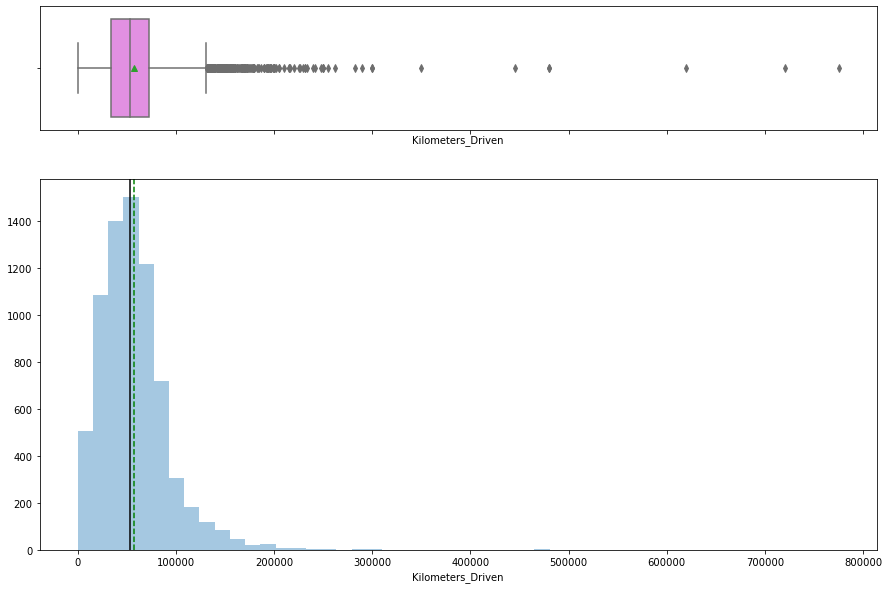

In [34]:
# Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data['Kilometers_Driven'])

**Think About It**: Kilometers_Driven is highly right-skewed. Can we use Log transformation of the feature to reduce/remove the skewness? Why can't we keep skewed data?

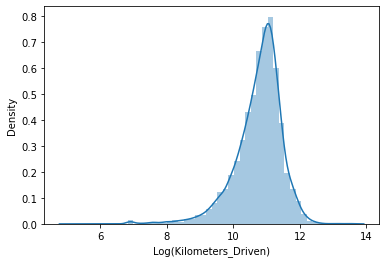

In [35]:
# Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)");

**Observations and Insights: _____**

applying the log transformation removed the skewness and normalized the distribution

In [37]:
# We can add a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

**Note:** Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as **'price_log'**.

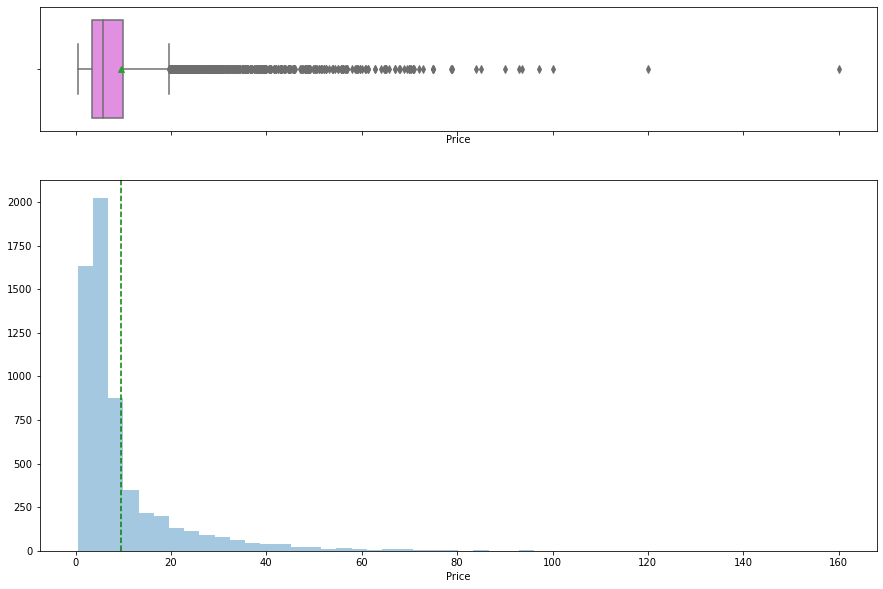

In [38]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot(data['Price'])

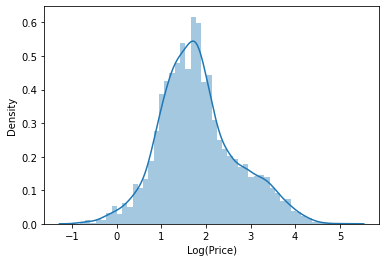

In [42]:
# Log transformation of the feature 'Price'
sns.distplot(np.log(data["Price"]), axlabel = "Log(Price)");

In [43]:
# We can Add a transformed Price feature in data
data["Price_log"]= np.log(data["Price"])

**Note:** Try plotting histogram and box-plot for different numerical features and understand how the data looks like.

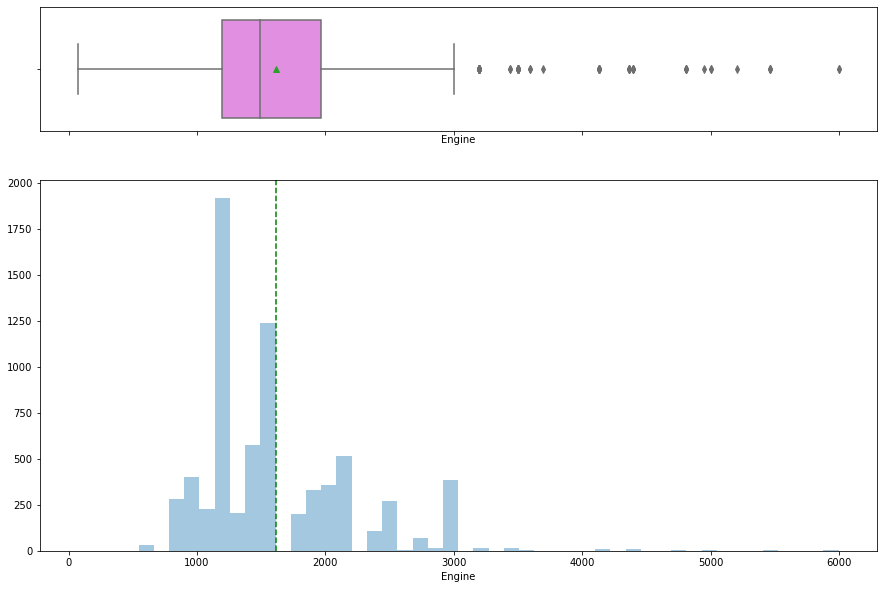

In [44]:
histogram_boxplot(data['Engine'])

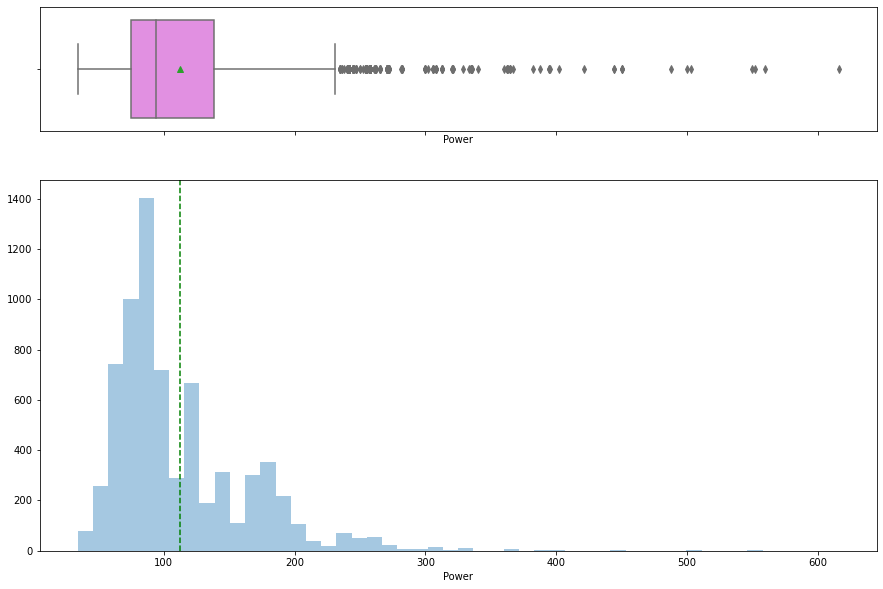

In [46]:
histogram_boxplot(data["Power"])

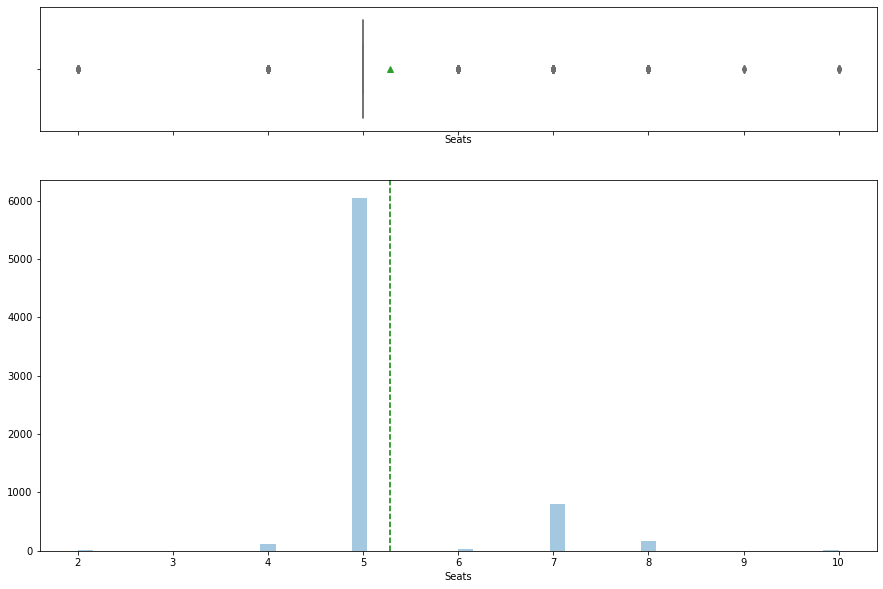

In [47]:
histogram_boxplot(data["Seats"])

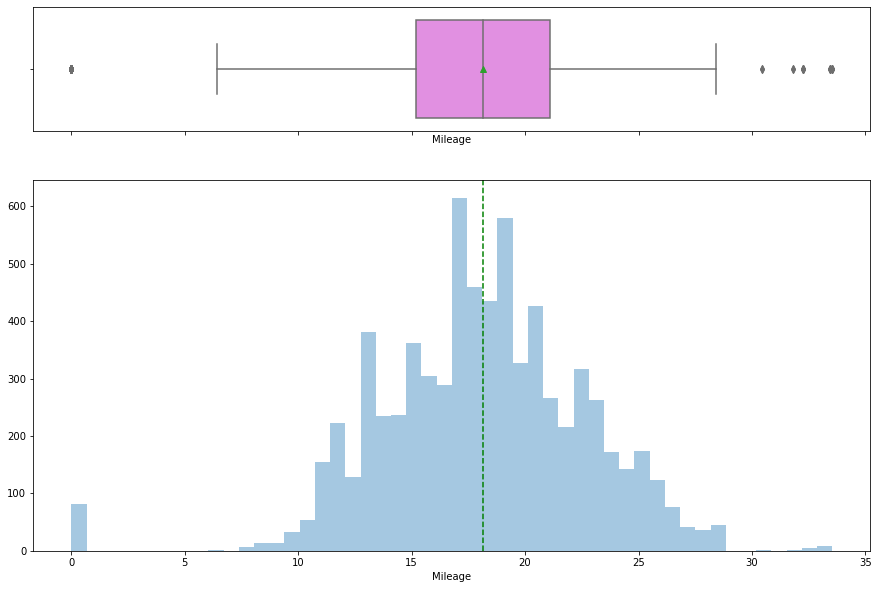

In [48]:
histogram_boxplot(data["Mileage"])

**Observations and Insights for all the plots: _____**


### -It is evident from the boxplots that Power, Engine and Mileage have outliers 

### -Mileage seems to almost follow a normal distribution

### -Engine and power appear to be right skewed.

## **2. Univariate analysis - Categorical Data**

In [49]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # Length of the column
    
    plt.figure(figsize = (15, 5))
    
    ax = sns.countplot(data[z], palette = 'Paired', order = data[z].value_counts().index)
    
    for p in ax.patches:
        
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class of the category
        
        x = p.get_x() + p.get_width() / 2 - 0.05 # Width of the plot
        
        y = p.get_y() + p.get_height()           # Hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # Annotate the percantage 
    
    plt.show() # Show the plot

**Let us plot barplot for the variable location. It will be helpful to know the number of percentage of cars from each city.**

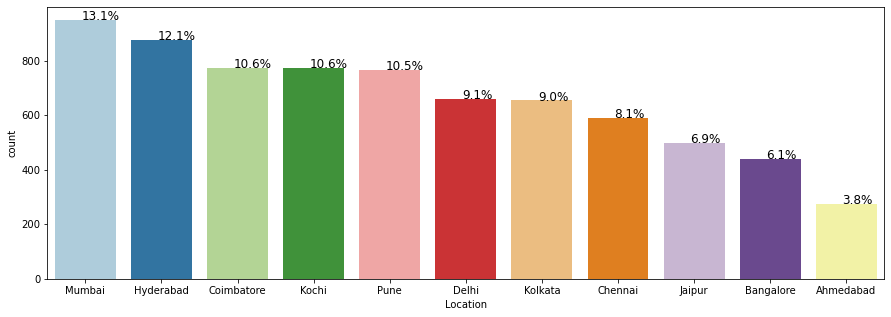

In [50]:
# Bar Plot for 'Location'
perc_on_bar('Location')

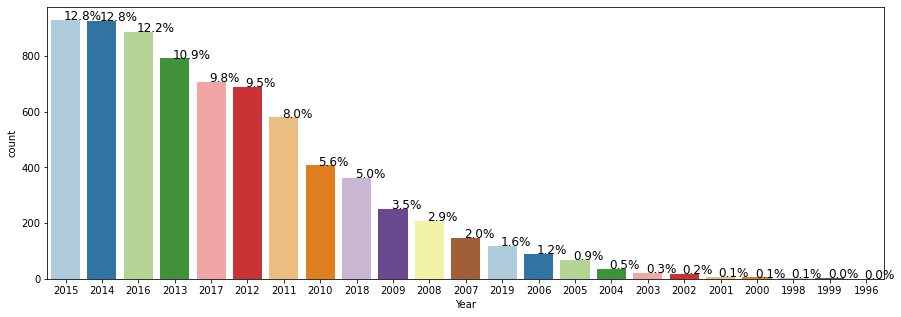

In [51]:
perc_on_bar("Year")

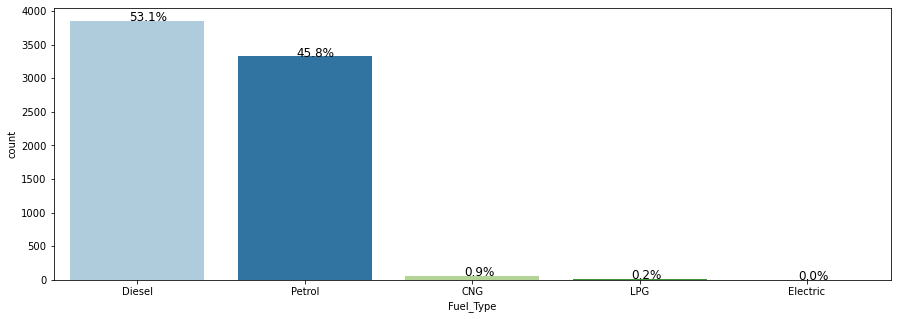

In [52]:
perc_on_bar("Fuel_Type")

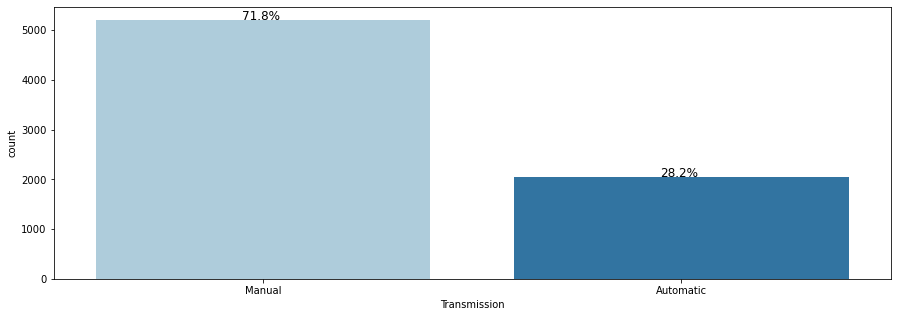

In [53]:
perc_on_bar("Transmission")

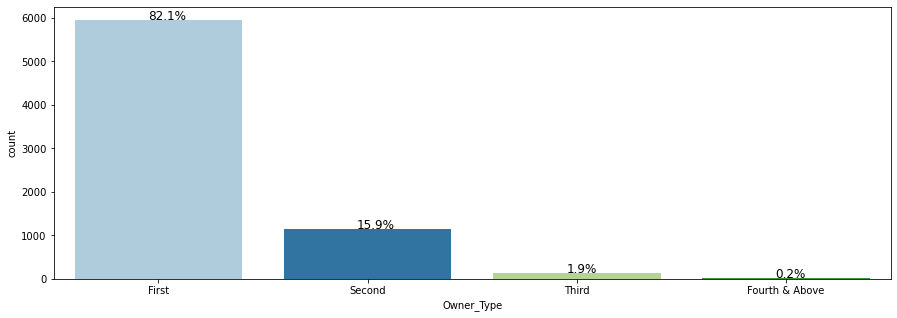

In [54]:
perc_on_bar("Owner_Type")

**Note:** Explore for other variables like Year, Fuel_Type, Transmission, Owner_Type`.

**Observations and Insights from all plots: _____**

### -Mumbai and Hyderabad are the cities where the most used cars are sold while Ahmedabad is the city with the least

### -The older a car, the less the chances of it getting sold. Buyers are interested in newer used cars

### -The type of fuel used by most cars is Diesel follow by Petrol and almost no cars use Electric

### -The transmission of most of the cars is Manual, just over 70 percent

### -Most owner are the first owners of the car.


## **Bivariate Analysis**

### **1. Scatter plot**
A scatter plot allows us to see relationships between two variables. 

**Note: Use log transformed values 'kilometers_driven_log' and 'price_log'**

<AxesSubplot:xlabel='Year'>

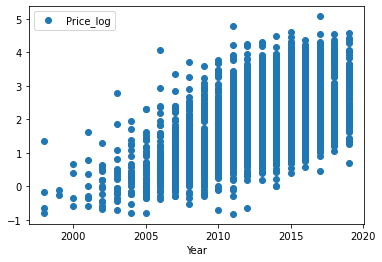

In [202]:
# Let us plot pair plot for the variables 'year' and 'price_log'
data.plot(x = 'Year', y = 'Price_log', style = 'o', )


### There seems to be correlation between the price and year. The newer a car, the more costly it is.

<b>Note:</b> Try to explore different combinations of independent variables and dependent variable. Understand the relationship between all variables.

<AxesSubplot:xlabel='Power'>

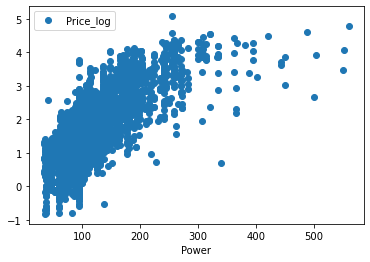

In [201]:
data.plot(x = 'Power', y = 'Price_log', style = 'o')

### The correlation between Price and Engine is high but no trend is visible between the two variables.

<AxesSubplot:xlabel='Engine'>

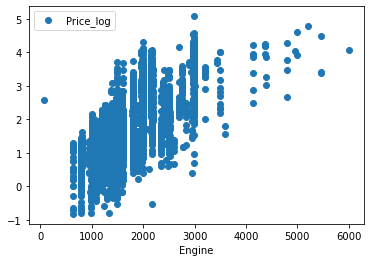

In [203]:
data.plot(x = 'Engine', y = 'Price_log', style = 'o')

### There is a high correlation between the price of a new version of a particular car and a used version of that same car as expected since the newer version of most things are more expensive than the used version.

**Observations and Insights from all plots: _____**


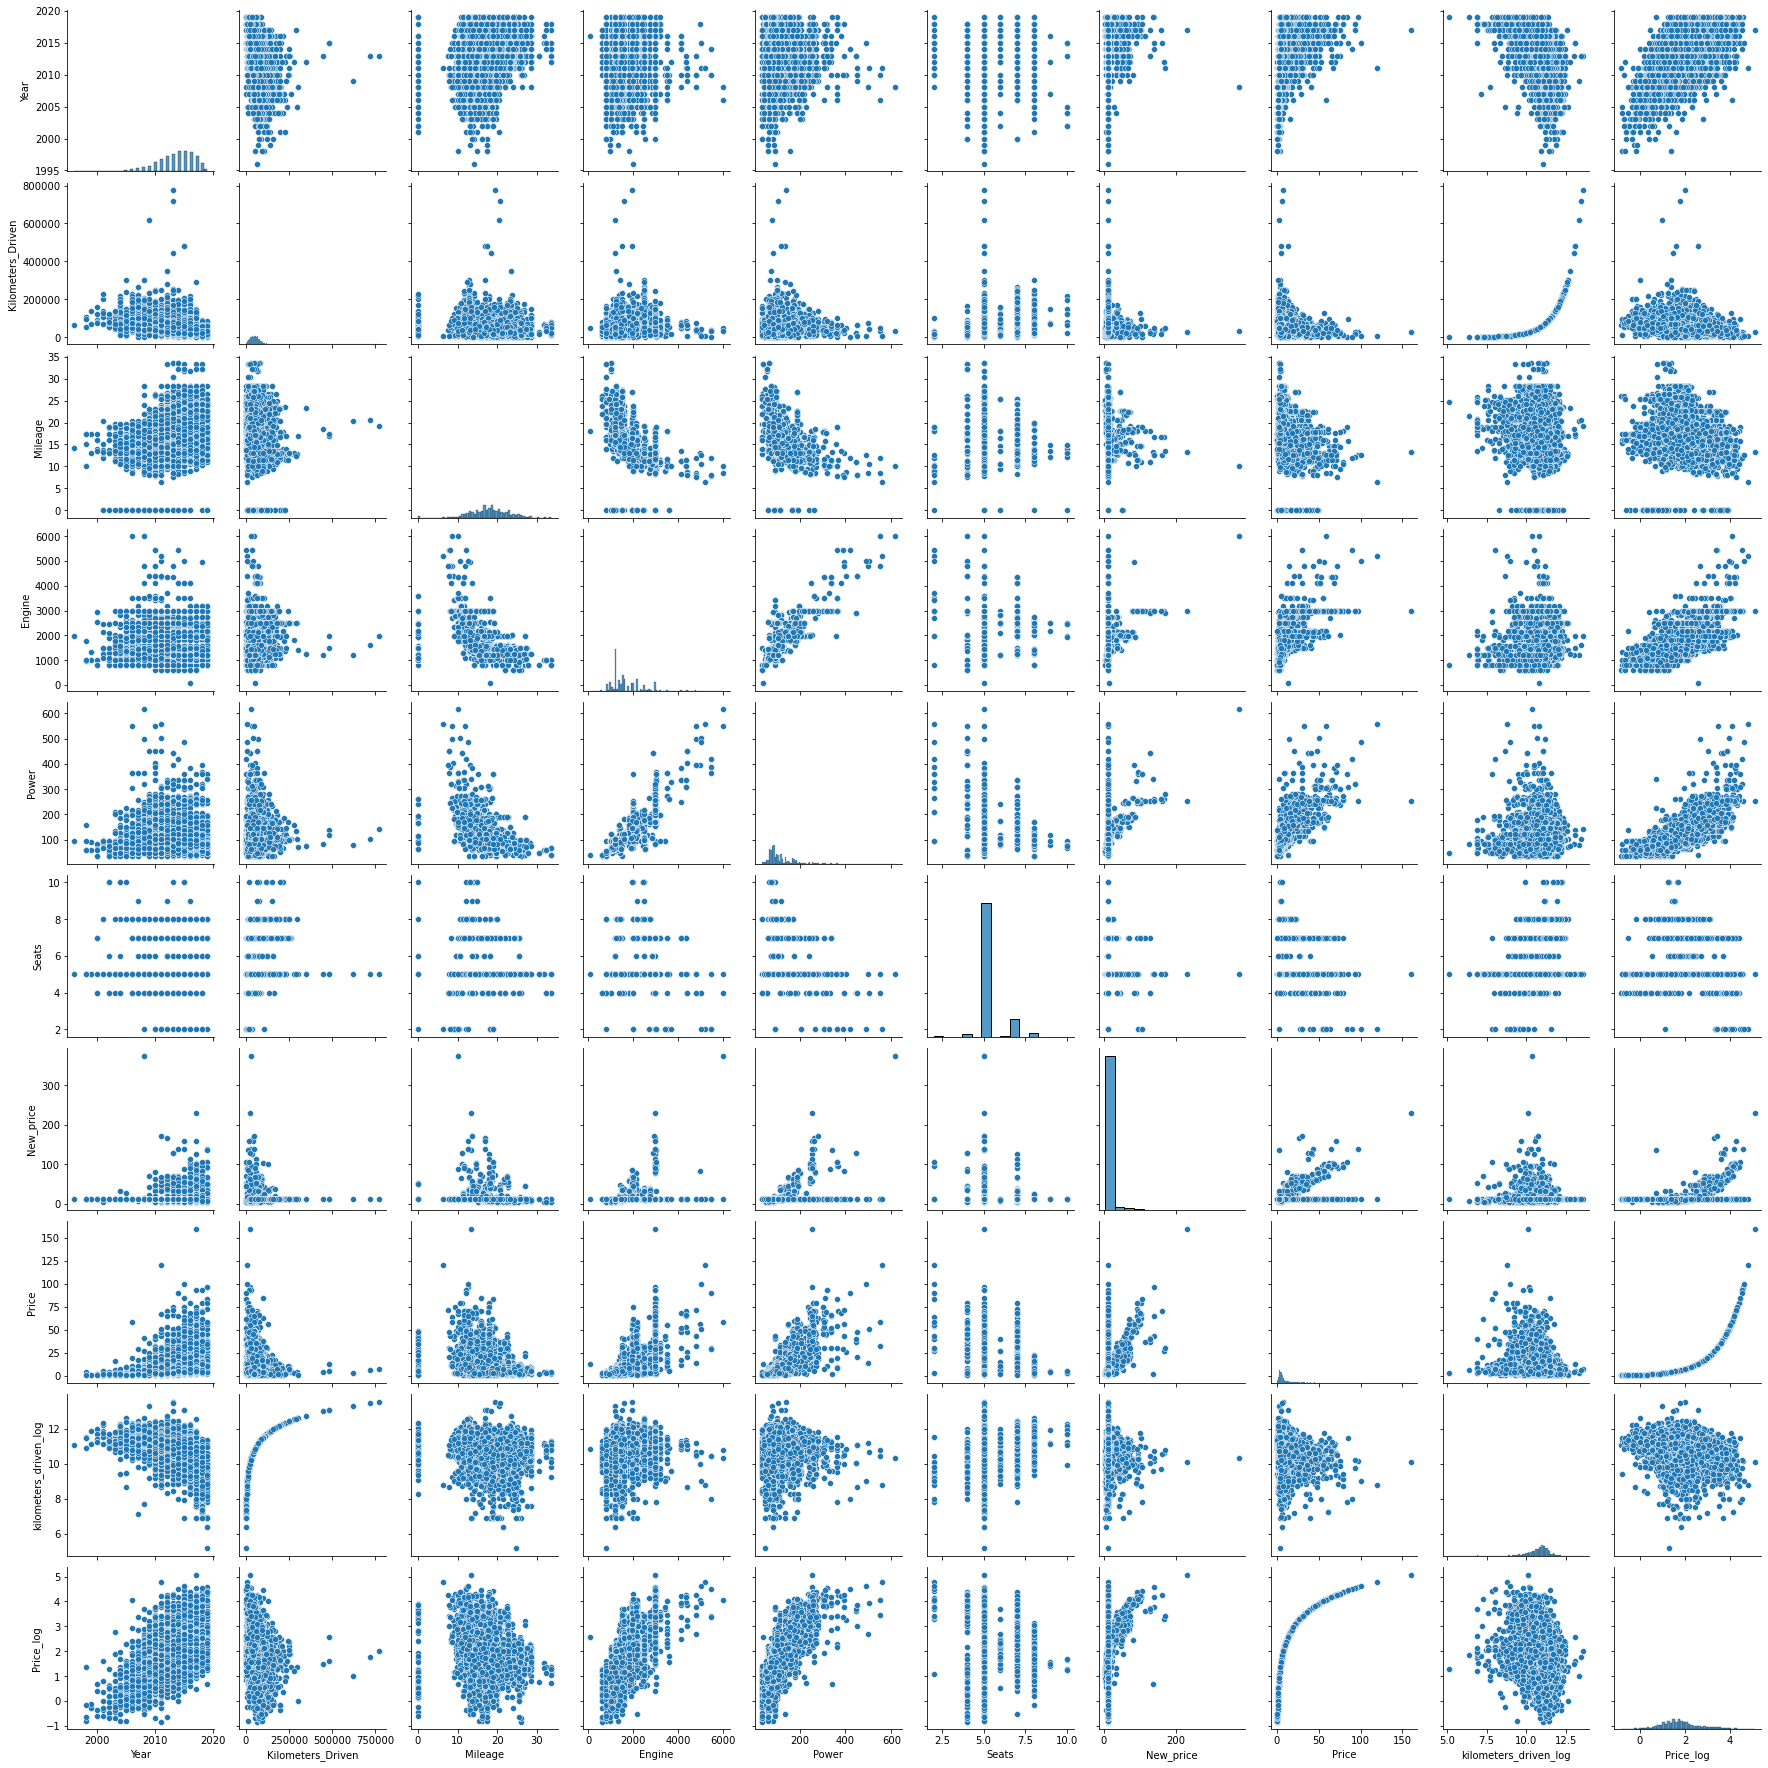

In [195]:
sns.pairplot(data)

### **2. Heat map**
Heat map shows a 2D correlation matrix between two numerical features.

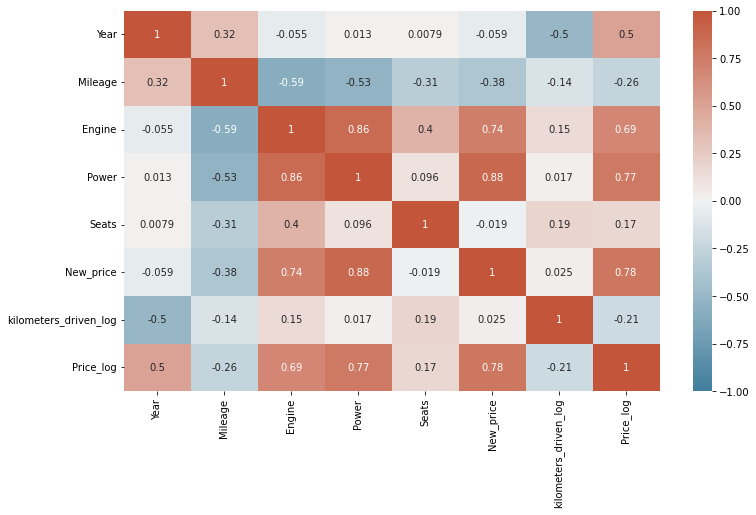

In [72]:
# We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize = (12, 7))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(data.drop(['Kilometers_Driven','Price'],axis = 1).corr(), annot = True, vmin = -1, vmax = 1,cmap=cmap)

plt.show()

**Observations and Insights: _____**

### -The Price_log is highly correlated with New_Price, Power, Engine and is moderately correlated with Year.

### -There is a strong negative correlation between the price and the Kilometer_driven which makes sense. the more a car was used, the cheaper it will be when being sold. 

### -seat has a very weak correlation with our target variable.

### **3. Box plot**

In [79]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    
    plt.figure(figsize = (15, 5)) # Setting size of boxplot
    
    sns.boxplot(x = z, y = data['Price']) # Defining x and y
    
    plt.show()
    
    plt.figure(figsize = (12, 5))
    
    plt.title('Without Outliers')
    
    sns.boxplot(x = z, y = data['Price'], showfliers = False) # Turning off the outliers
    
    plt.show()

#### Let us now plot bivariate analysis of target variable with a categorical variable 'Location'

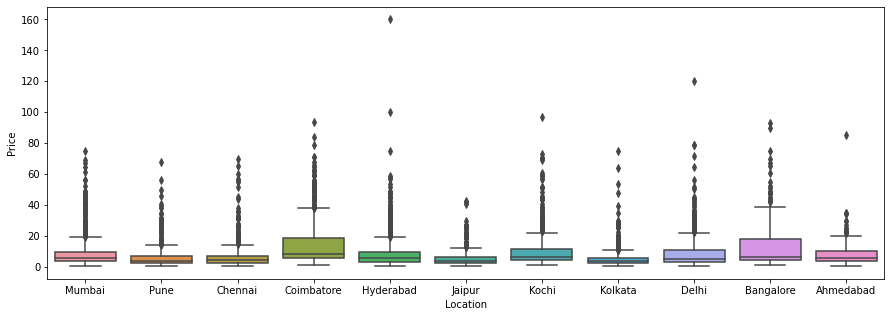

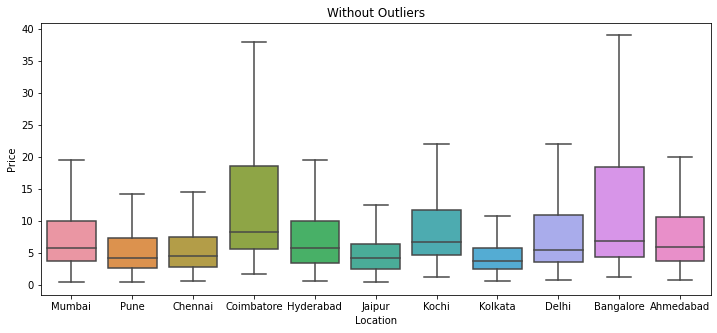

In [80]:
# Box Plot: Price vs Location
boxplot(data['Location'])

### Coimbatore and Bangatore  makes the most money from selling used cars which probably means they sell the more expensive used cars while Kolkata makes the least money from selling used cars.

<b>Note: </b> Explore by plotting box-plots for target variable and the other categorical variables like Fuel_Type, transmission, Owner_type.

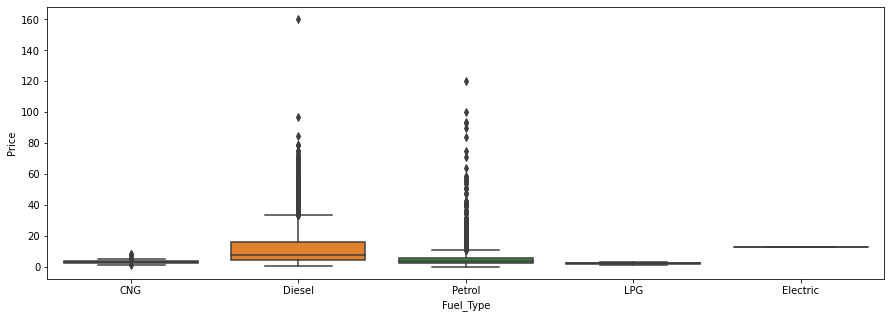

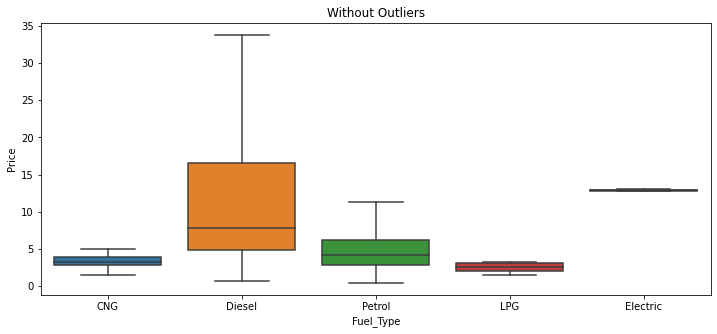

In [81]:
### Price vs Fuel Type
boxplot(data['Fuel_Type'])

### Diesel infleunces the price more than the other fuel types

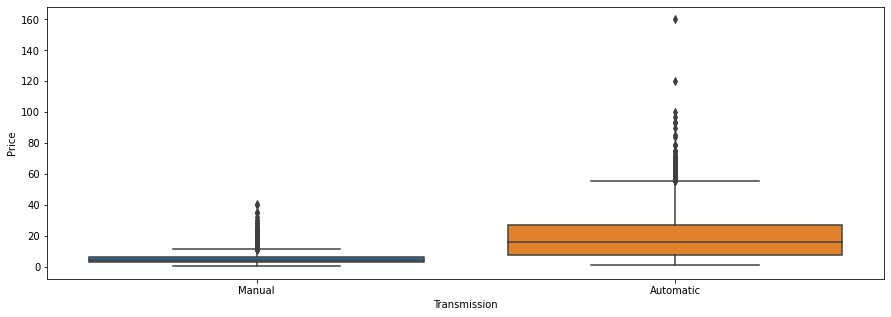

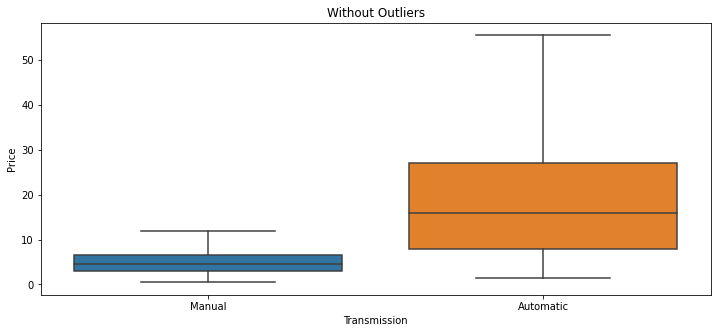

In [82]:
### Price vs Transmission
boxplot(data['Transmission'])

### Most costly cars are automatic transmission. 

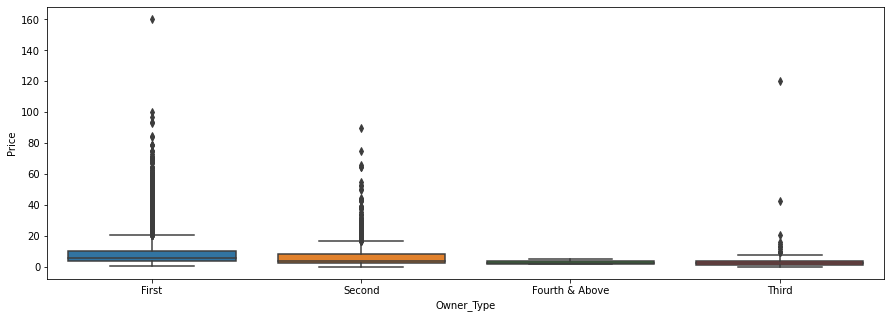

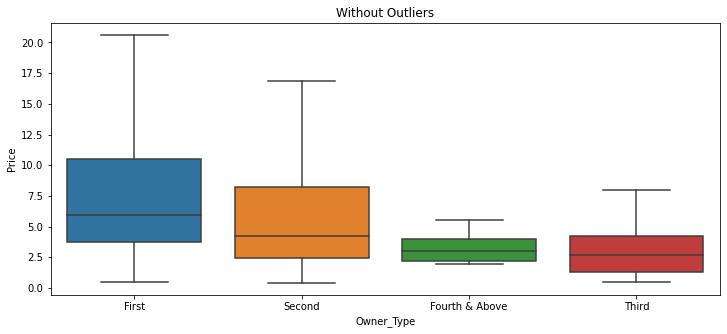

In [83]:
### Price vs Owner_Type
boxplot(data['Owner_Type'])

**Observations and Insights for all plots:__**


### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

#### **Observations and Insights: _____**

In [121]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,0.559616
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,2.525729
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397,1.504077
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663,1.791759
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,2.875822


### **Missing value treatment**

In [190]:
data["Brand"]= data["Name"].apply(lambda x: x.split(" ")[0].lower())

data["Brand"].value_counts()

maruti           1444
hyundai          1340
honda             743
toyota            507
mercedes-benz     380
volkswagen        374
ford              351
mahindra          331
bmw               311
audi              285
tata              228
skoda             202
renault           170
chevrolet         151
nissan            117
land               67
jaguar             48
fiat               38
mitsubishi         36
mini               31
volvo              28
porsche            19
jeep               19
datsun             17
isuzu               5
force               3
bentley             2
smart               1
ambassador          1
lamborghini         1
hindustan           1
opelcorsa           1
Name: Brand, dtype: int64

In [125]:
data["Model"]= data["Name"].apply(lambda x: x.split(" ")[1].lower())

data["Model"].value_counts()

swift      418
city       318
i20        303
innova     203
verna      200
          ... 
fortwo       1
redi         1
e            1
mustang      1
1.4gsi       1
Name: Model, Length: 218, dtype: int64

In [207]:
data.groupby(["Brand"])["Power"].median().sort_values(ascending= False)

Brand
bentley          584.00
lamborghini      560.00
porsche          300.00
jaguar           212.55
volvo            190.00
bmw              190.00
land             187.70
mercedes-benz    186.00
audi             174.33
mitsubishi       172.78
jeep             170.00
force            139.01
isuzu            134.00
toyota           125.00
mahindra         120.00
mini             113.98
skoda            108.49
volkswagen       103.20
honda             98.60
smart             94.00
hindustan         94.00
fiat              91.70
ford              89.84
opelcorsa         88.00
nissan            84.80
renault           83.80
hyundai           82.00
chevrolet         79.40
maruti            74.00
tata              74.00
datsun            67.00
ambassador        35.50
Name: Power, dtype: float64

In [200]:
data["Brand"].value_counts()

maruti           1444
hyundai          1340
honda             743
toyota            507
mercedes-benz     380
volkswagen        374
ford              351
mahindra          331
bmw               311
audi              285
tata              228
skoda             202
renault           170
chevrolet         151
nissan            117
land               67
jaguar             48
fiat               38
mitsubishi         36
mini               31
volvo              28
porsche            19
jeep               19
datsun             17
isuzu               5
force               3
bentley             2
smart               1
ambassador          1
lamborghini         1
hindustan           1
opelcorsa           1
Name: Brand, dtype: int64

In [92]:
# Now check the missing values of each column. Hint: Use isnull() method
data.isnull()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True
7249,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True
7250,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True
7251,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True


In [128]:
data[data["Seats"].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log,Brand,Model


#### **Observations and Insights: _____**

### New price is missing alot of data

**Missing values in Seats**

In [100]:
# Checking missing values in the column 'Seats'
print(data["Seats"].isnull().sum())

53


In [102]:
print(data["Seats"].isnull())

0       False
1       False
2       False
3       False
4       False
        ...  
7248    False
7249    False
7250    False
7251    False
7252    False
Name: Seats, Length: 7252, dtype: bool


**Think about it:** Can we somehow use the extracted information from 'Name' column to impute missing values?

**Hint:** Impute these missing values one by one, by taking median number of seats for the particular car, using the Brand and Model name.


In [106]:
# Impute missing values in Seats,you can use fillna method in pandas
data["Seats"].fillna(data["Seats"].median(), inplace=True)

In [107]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. 
#Hint: Use isnull() method
data["Seats"].isnull().sum()


0

**Missing values for Mileage**

In [157]:
# Now check missing values of each column. Hint: Use isnull() method
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
New_price                   0
Price                    1234
kilometers_driven_log       0
Price_log                1234
Brand                       0
Model                       0
dtype: int64

In [137]:
# Impute missing Mileage. For example, use can use median or any other methods.

data["Engine"].fillna(data["Engine"].median(), inplace=True)

In [173]:
cars_data= data[data["Price"].notna()]

In [175]:
cars_data.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
New_price                0
Price                    0
kilometers_driven_log    0
Price_log                0
Brand                    0
Model                    0
dtype: int64

In [177]:
cars_data.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,Price_log,Brand,Model
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.0,5.0,7.88,4.75,10.217020,1.558145,maruti,swift
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.0,5.0,11.57,4.00,11.512925,1.386294,hyundai,xcent
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.0,8.0,11.57,2.90,10.915088,1.064711,mahindra,xylo
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.1,5.0,11.57,2.65,10.736397,0.974560,maruti,wagon
6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44,936.0,57.6,5.0,11.57,2.50,10.757903,0.916291,chevrolet,beat


In [114]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. 
#Hint: Use isnull() method

data["Mileage"].isnull().sum()

0

**Missing values for Engine**

In [115]:
data["Engine"].isnull().sum()

46

**Missing values for Power**

In [116]:
data["Power"].isnull().sum()

175

**Missing values for New_price**

In [117]:
data["New_price"].isnull().sum()

6246

In [180]:
cars_data.isnull().sum()

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
New_price                0
Price                    0
kilometers_driven_log    0
Price_log                0
Brand                    0
Model                    0
dtype: int64

**Observations for missing values after imputing: _____**
### Its not mentioned to change null values of New_price,Power to change by mean/median, also its not good approach to take mean of 80% data specially in case of New_price column, we can remove this column from our dataset. The missing data in Power and Engine should be replaced by the median value.

## **Proposed approach**

- **Potential techniques -**  What different techniques should be explored? 
Linear Regression, Ridge/Lasso, Decision trees, Random Forest, XGBOOST Regressor. XGboost will most likely be the chosen model due to its execution speed and model performance.





- **Overall solution design -** What is the potential solution design?
The potential solution design would entail splitting the data into a training and test set , implement different regression problem algorithms and compare the results to see which will be best and create a model using that algorithm. XGboost will most likely be the chosen model due to its execution speed and model performance hence the solution design would entail tuning its hyperparameters such as n_estimators, max_depth and its learning rate as well. The model will be evaluated using repeated K-fold cross validation.  




- **Measures of success -** What are the key measures of success? 
 The models predictive power, explanatory power. Its variability isn also key.  Building a model that satisfies these criticals to a satisfactory level will be very important. Model evaluation metrics such as r squared , mean absolute error, root mean square error are key measures of successs. 

Please save the pre-processed dataset into a separate file so that we can continue without having to repeat the work we did in Milestone1. The stored data frame can be loaded into Milestone2 and implemented further.

To save the pre-processed data frame, please follow the below lines of code:

In [182]:
# Assume df_cleaned is the pre-processed data frame in your code, then
data.to_csv("cars_data.csv", index = False)

The above code helps to save the cleaned/pre-processed dataset into csv file, that can be further loaded into Milestone2.

In [188]:
cars_data.to_pickle("cleaned.csv")